In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
url = "https://raw.githubusercontent.com/FebricoJonata/AI-Final-Project/main/heart.csv"
dataset = pd.read_csv(url)

In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Deskripsi Data Parameter**

**age** — Umur

**sex** — (1 = Pria || 0 = Wanita)

**cp** — chest pain type (jenis nyeri dada) — 1: typical angina — 2: atypical 

**angina** — 3: non-anginal pain — 4: asymptomatic

**trestbps (resting blood pressure)** — targetnya adalah antara 60 dan 100 detak per menit

**chol** — kolestrol dalam mg/dl

**fbs (fasting blood sugar > 120 mg/dL)** — (1 = benar || 0 = salah) Info Tambahan: Kadar gula darah kurang dari 100 mg/dL adalah normal. Kadar gula darah dari 100 hingga 125 mg / dL dianggap pradiabetes. Jika 126 mg / dL atau lebih tinggi pada dua tes terpisah menderita diabetes

**restecg (resting electrocardiographic results)** — (0: normal || 1: memiliki kelainan gelombang ST-T || 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri)

**thalach** — Detak jantung maksimal pasien

**exang (exercise induced angina)** —  (1 = yes || 0 = no) merupakan keluhan umum pasien jantung ketika olahraga, terutama ketika dingin

**oldpeak** — Depresi ST akibat olahraga relatif terhadap istirahat

**slope** — kemiringan segmen pada latihan ST puncak (0 = upsloping; 1 = flat; 2 = downsloping)

**ca** — jumlah pembuluh darah utama (0–3) diwarnai dengan fluoroskopi

**thal** — 3 = normal; 6 = fixed defect; 7 = reversable defect

**target** — Memiliki Penyakit atau Tidak (1=yes || 0=no)

**Visualisasi dan analisis Data**

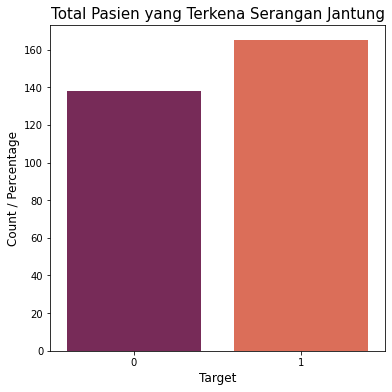

In [ ]:
# Memvisualisasikan data pasien yang terkena penyakit jantung  

x = plt.subplots(figsize =(6,6))
x = sns.countplot(x = "target", data=dataset, palette="rocket")
x.set_xlabel ("Target",fontsize=12)
x.set_ylabel ("Count / Percentage",fontsize=12)
x.set_title  ("Total Pasien yang Terkena Serangan Jantung",fontsize =15)
sns.set_style("whitegrid")
plt.show()

In [ ]:
TidakKenaPenyakit = len(dataset[dataset.target == 0])
TerkenaPenyakit = len(dataset[dataset.target == 1])
print("Persentasi Pasien yang tidak terkena Penyakit Jantung: {:.2f}%".format((TidakKenaPenyakit / (len(dataset.target))*100)))
print("Persentasi Pasien yang terkena Penyakit Jantung: {:.2f}%".format((TerkenaPenyakit / (len(dataset.target))*100)))

Persentasi Pasien yang tidak terkena Penyakit Jantung: 45.54%
Persentasi Pasien yang terkena Penyakit Jantung: 54.46%


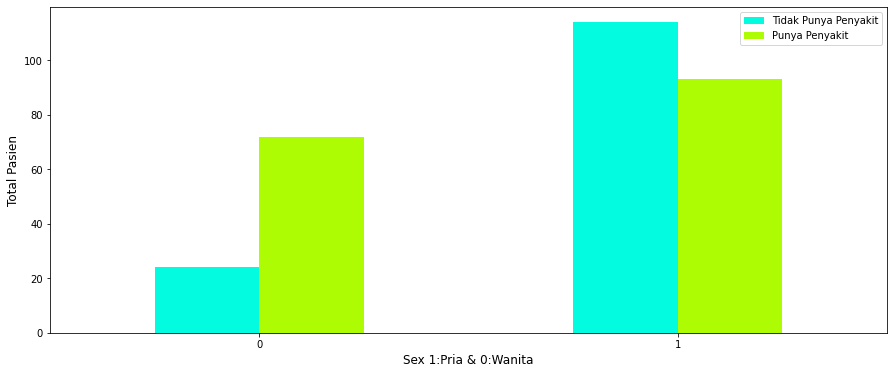

In [ ]:
#Membuat korelasi dan memvisualisasikan hubungan antara Sex dan penyakit

pd.crosstab(dataset.sex,dataset.target).plot(color=['#03fcdf','#adfc03'],kind="bar",figsize=(15,6))
plt.xlabel('Sex 1:Pria & 0:Wanita',fontsize=12)
plt.ylabel('Total Pasien',fontsize=12)
plt.xticks(rotation = 0)
plt.legend(["Tidak Punya Penyakit", "Punya Penyakit"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Banyak Pasien')

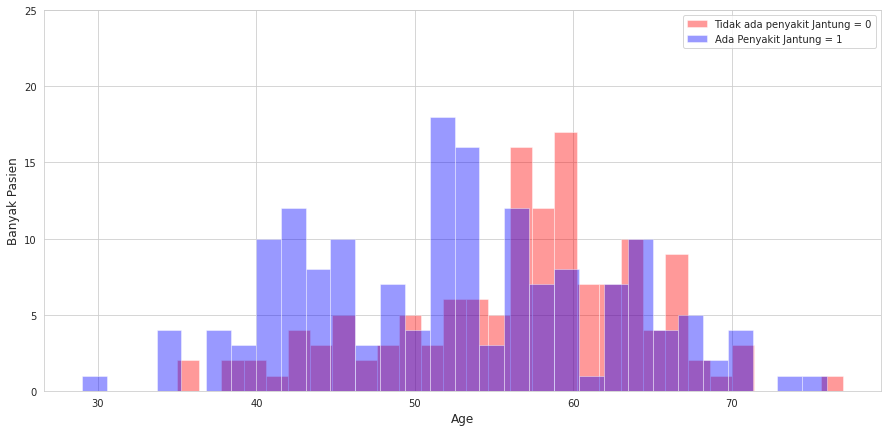

In [ ]:
#Korelasi hubungan antara penyakit jantung dan umur

plt.subplots(figsize = (15,7))
sns.distplot(dataset[dataset['target'] == 0]['age'], bins = 30, kde = False,color = 'red',label = 'Tidak ada penyakit Jantung = 0')
sns.distplot(dataset[dataset['target'] == 1]['age'], bins = 30, kde = False,color = 'blue',label = 'Ada Penyakit Jantung = 1')
plt.ylim(0,25)
plt.legend()
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Banyak Pasien', fontsize = 12)

Dilihat dari grafik yang dihasilkan, banyak pasien yang berpotensi terkena penyakit jantung berkisar antara umur **40–55 tahun**, dan frekuensi tertingginya berkisar antara **umur 52–55 tahun**

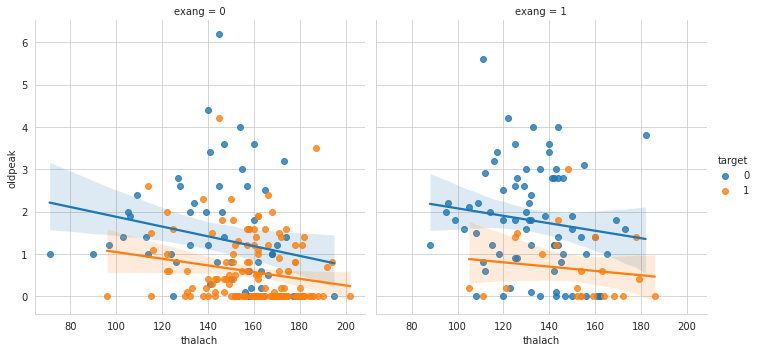

In [ ]:
#Visualisasi Data Hubungan antara thalach(maximum heart archived), oldpeak(Depresi ST), exang(ada keluhan angina atau tidak) dan target (Memiliki Penyakit atau Tidak (1=yes, 0=no)

sns.lmplot(x ='thalach', y ='oldpeak', col ='exang', hue ='target', data=dataset)

Dilihat dari grafik, pasien yang tidak berolahraga/ tidak ada keluhan angina **(exang)** yang memiliki heart rate berkisaran 120  **(thalach)** berkemungkinan memiliki penyakit jantung, hal ini masuk akal karena Depresi ST yang rendah menghasilkan orang pada risiko lebih besar untuk penyakit jantung. Sedangkan depresi ST tinggi dianggap normal & sehat (oldpeak).

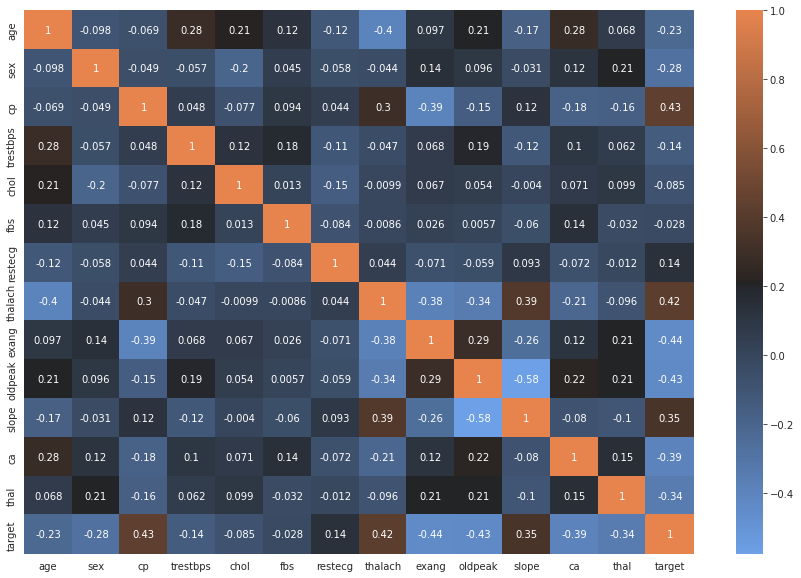

In [ ]:
#Menghasilkan Output corelasi

corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#iloc = memilih data berdasarkan index


x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
#Ubah data menjadi training set dan testing set

In [34]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=1)
#Mendapatkan Model
model_DecisionTree.fit(x_train, y_train)
#Train atau Fit model
y_prediction = model_DecisionTree.predict(x_test)
#Dapakan y prediction
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [38]:
from sklearn.metrics import accuracy_score
print('accuracy score dari aloritma DecisionTree adalah : {}%'.format(accuracy_score(y_prediction,y_test)*100))


accuracy score dari aloritma DecisionTree adalah : 68.85245901639344%


In [37]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_DecisionTree.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Pasien Tidak Menderita Penyakit Jantung')
else:
  print('Pasien Menderita Penyakit Jantung')

[0]
Pasien Tidak Menderita Penyakit Jantung
